In [3]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

Import fastai lib


### Imports

NOTE: this notebook requires fastai lib to be in same dir
- can be done by symlinking fastai folder here
- same is done with the data folder

In [4]:
# This file contains all the main external libs we'll use
from fastai.imports import *

ModuleNotFoundError: No module named 'fastai'

In [5]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

ModuleNotFoundError: No module named 'fastai'

In [6]:
PATH = "data/keys/"
sz=224

In [7]:
print(torch.cuda.is_available())
torch.backends.cudnn.enabled

NameError: name 'torch' is not defined

# Key Recogniser 

Using resnet to recognise keys which are unique.

Should be able to distinguish between a two keys its knows, and only recognise those i.e. not transfer to images which are keys, but are the incorrect keys.


## the photo data 

I took these photos with my phone quickly and upload to the server using: scp

Here we taking the raw folders that i took and placing the images into train and valid folders

In [187]:
RAW_DATA_PATH = '/home/ubuntu/key_photos/'

In [188]:
os.listdir(RAW_DATA_PATH)

['green', 'work', 'royal', 'nick', 'shed', 'car']

In [189]:
# reset everthing

# %rm -rf {PATH}valid
# %rm -rf {PATH}train

In [190]:
# CREATE FOLDERS

%mkdir -p {PATH}/valid
%mkdir -p {PATH}/train
%mkdir -p {PATH}/test


In [191]:
for i in os.listdir(RAW_DATA_PATH):
    %mkdir -p {PATH}/valid/{i} 
    %mkdir -p {PATH}/train/{i} 

In [192]:
%ls {PATH}valid/nick
%ls {PATH}train

car/  green/  nick/  royal/  shed/  work/


In [105]:
categories = os.listdir(RAW_DATA_PATH)

check_photos = os.listdir(f'{RAW_DATA_PATH}{categories[0]}')
check_photos

this


In [198]:
# loop thru all the categories and create the appropriate train valid test folders
# copies 1 file to this folder - this is fine for a small dataset
dest = 'valid'

num_files_to_copy = 3

# def copy_from_src():


for f in os.listdir(RAW_DATA_PATH):
    
    if(  not (f in ['valid', 'train', 'test', 'tmp', 'models'] ) ):
        
        direc = os.listdir(f'{RAW_DATA_PATH}{f}')
#         print(f'{f}:  {len(direc)} ')
        
        files = os.listdir(f'{RAW_DATA_PATH}{f}')[:num_files_to_copy]
        
        for file in files:
            source = f'{RAW_DATA_PATH}{f}/{file}'
            destination = f'{PATH}{dest}/{f}/{file}'

#             !echo {source} {destination}
            !mv {source} {destination}
        
#         if(len(direc) > 0):
#             print( f'folder name: {f} moved file' )
#             file = os.listdir(f'{PATH}{f}')[0]
#             print(file)
#             %mv {PATH}{f}/{file} {PATH}{dest}/{f}/{file}
            
#         for i in os.listdir(f'{PATH}/{f}'):
            

In [199]:
!ls {PATH}valid/nick
!ls {PATH}train/nick

## Look at the photos

In [175]:
some_files = os.listdir(f'{PATH}train/green')
some_files

['IMG_20180208_174805.jpg',
 'IMG_20180208_174800.jpg',
 'IMG_20180208_174808.jpg',
 'IMG_20180208_174830.jpg',
 'IMG_20180208_174820.jpg',
 'IMG_20180208_174803.jpg']

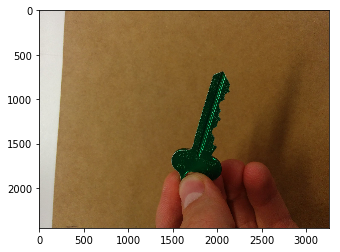

In [178]:
img = plt.imread(f'{PATH}train/green/{some_files[3]}')
plt.imshow(img);

In [179]:
img.shape

(2448, 3264, 3)

In [180]:
img[:4,:4]

array([[[213, 209, 206],
        [213, 209, 206],
        [214, 210, 207],
        [215, 211, 208]],

       [[214, 210, 207],
        [214, 210, 207],
        [214, 210, 207],
        [213, 209, 206]],

       [[215, 211, 208],
        [214, 210, 207],
        [214, 210, 207],
        [213, 209, 206]],

       [[213, 209, 206],
        [214, 210, 207],
        [215, 211, 208],
        [215, 211, 208]]], dtype=uint8)

# TEH MODEL

### Set up a data augmentation  - not many images

In [181]:
tfms=tfms_from_model(resnet34, sz, aug_tfms=transforms_top_down, max_zoom=1.5)

In [182]:
def get_augs():
    data = ImageClassifierData.from_paths(PATH, bs=2, tfms=tfms, num_workers=1)
    x,_ = next(iter(data.aug_dl))
    return data.trn_ds.denorm(x)[1]

In [183]:
ims = np.stack([get_augs() for i in range(20)])

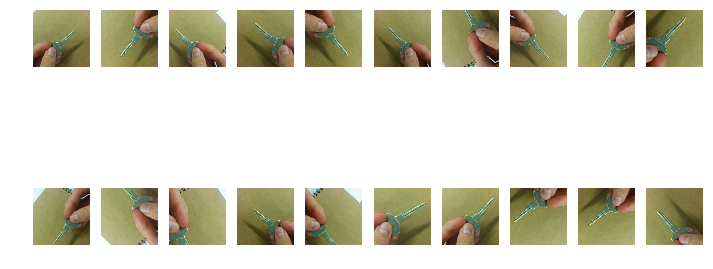

In [184]:
plots(ims, rows=2)

# Architecture stuff


In [186]:
arch=resnet34
data = ImageClassifierData.from_paths(PATH, tfms=tfms)
learn = ConvLearner.pretrained(arch, data, precompute=True)


100%|██████████| 1/1 [00:03<00:00,  3.21s/it]


In [23]:
learn.fit(0.002, 1000)

HBox(children=(IntProgress(value=0, description='Epoch', max=1000), HTML(value='')))

epoch      trn_loss   val_loss   accuracy               
    0      1.612009   1.499926   0.111111  
    1      1.527129   1.361893   0.222222       
    2      1.509539   1.241744   0.222222       
    3      1.417931   1.121694   0.444444       
    4      1.365513   1.007468   0.666667       
    5      1.341601   0.895769   0.666667       
    6      1.259025   0.790412   0.666667       
    7      1.212369   0.692734   0.777778       
    8      1.164379   0.612597   0.777778       
    9      1.08563    0.54527    0.777778       
    10     1.025481   0.4925     0.777778       
    11     0.965372   0.450143   0.777778        
    12     0.911912   0.420473   0.777778        
    13     0.867952   0.394013   0.777778        
    14     0.822708   0.379096   0.777778        
    15     0.777566   0.365344   0.777778        
    16     0.736445   0.354559   0.777778        
    17     0.696269   0.34479    0.777778        
    18     0.664711   0.339554   0.777778        
    19   

   320     0.006865   0.204427   0.777778          
   321     0.006786   0.205012   0.777778          
   322     0.006719   0.203985   0.777778          
   323     0.006707   0.204512   0.777778          
   324     0.006661   0.207787   0.777778          
   325     0.006618   0.209025   0.777778          
   326     0.006578   0.210156   0.777778          
   327     0.006562   0.208781   0.777778          
   328     0.006488   0.210869   0.777778          
   329     0.006484   0.209394   0.777778          
   330     0.006461   0.209431   0.777778          
   331     0.006527   0.206117   0.888889          
   332     0.006503   0.207856   0.888889         
   333     0.006483   0.209143   0.888889          
   334     0.006447   0.211349   0.777778          
   335     0.006385   0.209802   0.888889          
   336     0.006469   0.209467   0.888889          
   337     0.006436   0.210832   0.888889          
   338     0.006437   0.208518   0.888889          
   339     0.

   634     0.003184   0.213851   0.777778          
   635     0.003178   0.21343    0.777778          
   636     0.003166   0.215443   0.777778          
   637     0.003153   0.215864   0.777778          
   638     0.003169   0.215422   0.777778          
   639     0.00316    0.218719   0.777778          
   640     0.003178   0.218313   0.777778          
   641     0.003146   0.218367   0.777778          
   642     0.003124   0.218962   0.777778          
   643     0.003143   0.217092   0.777778          
   644     0.003147   0.216341   0.777778          
   645     0.003118   0.214649   0.777778          
   646     0.003105   0.210911   0.777778          
   647     0.003081   0.208168   0.777778          
   648     0.003074   0.209346   0.777778          
   649     0.003085   0.208404   0.777778          
   650     0.003069   0.20897    0.777778          
   651     0.003064   0.211085   0.777778          
   652     0.003034   0.209031   0.777778          
   653     0

   949     0.001922   0.213319   0.777778          
   950     0.00192    0.212671   0.777778          
   951     0.001918   0.214919   0.777778          
   952     0.001912   0.210968   0.777778          
   953     0.001945   0.212812   0.777778          
   954     0.001935   0.210831   0.777778          
   955     0.001935   0.210751   0.777778          
   956     0.001939   0.208823   0.777778          
   957     0.001927   0.207395   0.777778          
   958     0.001925   0.208298   0.777778          
   959     0.001919   0.210253   0.777778          
   960     0.001978   0.208629   0.777778          
   961     0.001973   0.209199   0.777778          
   962     0.001952   0.210601   0.777778          
   963     0.001938   0.206571   0.777778          
   964     0.001946   0.20925    0.777778          
   965     0.001949   0.207296   0.777778          
   966     0.001941   0.206121   0.777778          
   967     0.001918   0.206529   0.777778          
   968     0

[0.21139945, 0.7777777910232544]

In [24]:
learn.save('224_lastlayer')

In [25]:
learn.load('224_lastlayer')

In [26]:
data.val_y

array([0, 0, 0, 1, 1, 1, 2, 2, 2])

In [27]:
data.classes

['2', '5', '6']

In [28]:
log_preds = learn.predict()
log_preds.shape

(9, 3)

In [139]:
log_preds[:10]

array([[-0.01494, -5.89671, -5.74295, -6.09101, -5.38344, -6.20572],
       [-0.08777, -3.8876 , -4.37386, -3.18342, -5.06199, -5.75763],
       [-0.0586 , -3.56963, -4.32413, -4.38614, -5.93639, -7.78601],
       [-5.63873, -0.02162, -4.92355, -5.4976 , -5.29613, -6.53785],
       [-3.05542, -0.12495, -4.34291, -3.68044, -5.16145, -3.63398],
       [-6.11889, -0.00551, -7.00426, -6.53762, -7.67823, -7.64821],
       [-4.0451 , -3.80567, -0.39486, -4.26356, -1.38731, -3.78753],
       [-3.20653, -3.36578, -0.29427, -2.66022, -3.75179, -2.44782],
       [-3.14106, -3.39421, -0.71134, -3.64712, -1.07877, -2.71611],
       [-4.79889, -4.22932, -0.8197 , -1.27001, -2.02046, -2.09385]], dtype=float32)

In [29]:
preds = np.argmax(log_preds, axis=1)  # from log probabilities to 0 or 1
probs = np.exp(log_preds) # probability array of predictions

In [43]:
np.argmax(probs[4]) 

2

In [146]:
def rand_by_mask(mask): return np.random.choice(np.where(mask)[0], 4, replace=False)
def rand_by_correct(is_correct): return rand_by_mask((preds == data.val_y)==is_correct)

In [147]:
def plot_val_with_title(idxs, title):
    imgs = np.stack([data.val_ds[x][0] for x in idxs])
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(data.val_ds.denorm(imgs), rows=1, titles=title_probs)

In [148]:
def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

In [149]:
def load_img_id(ds, idx): return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8))

Correctly classified


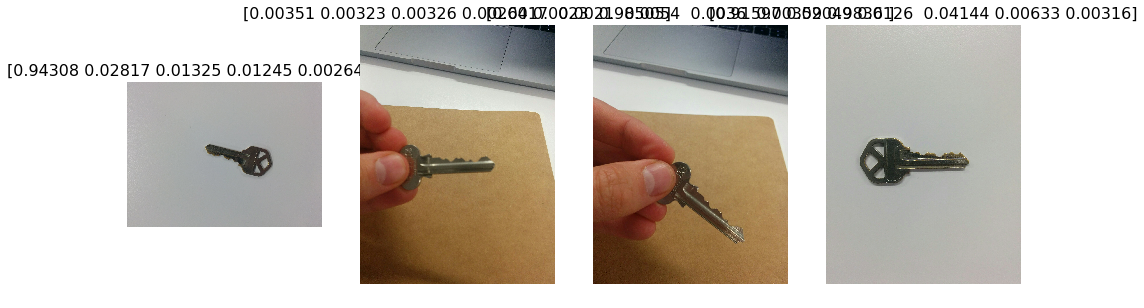

In [150]:
plot_val_with_title(rand_by_correct(True), "Correctly classified")